Pattern and Anomaly Detection Lab Experiment 4

## Anomaly Detection using Decision Tree and Resampling

Reeha Parkar

IBM AIML Batch - AIML1

BE Electronics 

**60001180046**

# Section 1: Anamoly detection using decision tree

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# creating random sample for decision tree based on make_classifcation
# make_classication is a built in function in sklearn
# from 5000 samples, 90% is true data, 10% is anamoly data
# n_informative : how to distribute data wrt gaussian feature

features, label = make_classification(n_samples=5000, n_features=2, 
                                      n_informative=2, n_redundant=0, 
                                      n_repeated=0, n_classes=2, 
                                      n_clusters_per_class=1,
                                      weights=[0.90, 0.10], flip_y=0.01,
                                      class_sep=1.5, random_state=42)

In [ ]:
# converting table to data frame
# label can be either 0 or 1
df = pd.DataFrame(features, columns=['feature1', 'feature2'])
df['label'] = label
print(df)

      feature1  feature2  label
0     0.083748 -1.924311      0
1     3.161682 -2.016850      0
2     0.601813 -0.447617      0
3     0.379934 -1.622870      0
4     0.246233 -2.249783      0
...        ...       ...    ...
4995  0.253059  2.352886      1
4996  1.996674 -1.479244      0
4997  0.817619  1.964244      1
4998  3.225591 -0.393662      0
4999  2.087493 -1.061010      0

[5000 rows x 3 columns]


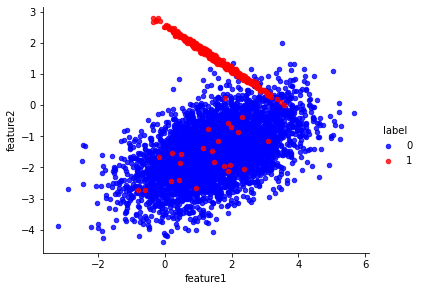

In [ ]:
# plotting the data using seaborn
colors = ['blue', 'red']
sns.lmplot('feature1', 'feature2', data=df, hue='label',
           palette=colors, fit_reg=False, scatter_kws={'s': 20})
plt.gcf().set_size_inches(6,4);

In [ ]:
# applying decision tree classifier to the data
# decision tree object is created
tree_plain = DecisionTreeClassifier(max_depth=1, class_weight=None) #not assigning weights to any class or sample set

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


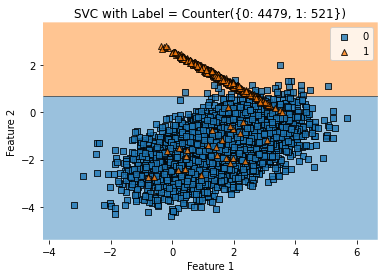

In [ ]:
tree_plain_fit = tree_plain.fit(features, label)
plot_decision_regions(features, label, tree_plain_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

In [ ]:
# class 0-4471;
# class 1-521;

In [ ]:
#finding anamoly point using confusion matrix 
cm_tree_plain=confusion_matrix(label, tree_plain.predict(features))
print(cm_tree_plain)
accuracy_tree_plain = accuracy_score(label, tree_plain.predict(features))
print(f'Accuracy: {accuracy_tree_plain}')

[[4442   37]
 [  47  474]]
Accuracy: 0.9832


In [ ]:
# misclassified 37 normal points and 47 anomalies, in order to improve the result, we will now implement cost-sensitive learning

For our decision tree, cost-sensitive learning can be introduced through the parameter class_weight. In the previous analysis, this parameter was set to None, which means that all points were given equal weight. In the next iteration, we will set class_weight to balanced. In this case, the weights are set inversely proportional to the frequency of the class. That is, the cost of making a mistake is inversely proportional to the number of instances of that class

what class_weight = 'balance' does is that if there is a mistake wrt class 1, they will have higher weight whereas if there is a mistake wrt class 0 they will have lower weight

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


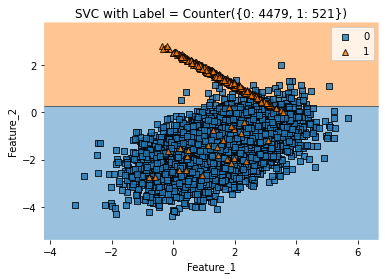

In [ ]:
tree_bal = DecisionTreeClassifier(max_depth=1, class_weight='balanced')
tree_bal_fit = tree_bal.fit(features, label)
plot_decision_regions(features, label, tree_bal_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

In [ ]:
# in this case for the graph plotted above, the line is closer to 0 than the one done previously where class_weight was None

In [ ]:
cm_tree_bal=confusion_matrix(label, tree_bal.predict(features))
print(cm_tree_bal)
accuracy_tree_bal = accuracy_score(label, tree_bal.predict(features))
print(f'Accuracy: {accuracy_tree_bal}')

[[4381   98]
 [  27  494]]
Accuracy: 0.975


The accuracy has reduced and we misclassified more normal points (98 vs. 37 previously). However, we improved our classification of anomalies. Only 27 were misclassified (vs. 47 before). If what matters most to us are the anomalies, the lower misclassification rate is a significant improvement. Cost-sensitive learning is doing what it is meant to do: help detect anomalies.

# Section 2: Adaptive resampling

Adaptive resampling using Support vector classifier (SVC)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


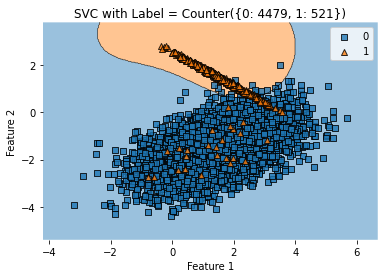

In [ ]:
clf = SVC().fit(features, label)
plot_decision_regions(features, label, clf)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

In [ ]:
# using confusion matrix 
cm = confusion_matrix(label, clf.predict(features))
print(cm)

[[4457   22]
 [  47  474]]


In [ ]:
# number of anomalies is 47 and misclassified are 22, this is still better than the previous case

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
accuracy = accuracy_score(label, clf.predict(features))
print(f'Accuracy: {accuracy}')

True Negative: 4457
False Positive: 22
False Negative: 47
True Positive: 474
Accuracy: 0.9862


In [ ]:
# increase in accuracy 

Oversampling

In [ ]:
#using RandomOverSampler algorithm to add noise 
resample_ratio = 0.3 # (anomalies / normal) after resampling
sample_normal = tn + fp # total number of true normal points
sample_anomaly = int(resample_ratio*sample_normal) # must be an integer
sampling_dict = {0: sample_normal, 1: sample_anomaly}
ros = RandomOverSampler(ratio=sampling_dict, random_state=0) 
features_resampled, label_resampled = ros.fit_sample(features,label)

In [ ]:
Counter(label_resampled)

Counter({0: 4479, 1: 1343})

In [ ]:
# there has been an increase in the number of sample, greater than 5000

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


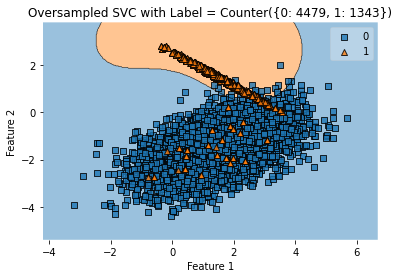

In [ ]:
clf_ros = SVC().fit(features_resampled, label_resampled)
plot_decision_regions(features_resampled, label_resampled, clf_ros)
plt.title(f'Oversampled SVC with Label = {Counter(label_resampled)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.gcf().set_size_inches(6,4)

In [ ]:
cm_ros = confusion_matrix(label, clf_ros.predict(features))
cm_ros

array([[4443,   36],
       [  35,  486]])

In [ ]:
# Reduction in the number of anamolies from 47 to 35 by oversampling

In [ ]:
tn_ros, fp_ros, fn_ros, tp_ros = cm_ros.ravel()
print('After Random Oversampling')
print(f'True Negative: {tn_ros}')
print(f'False Positive: {fp_ros}')
print(f'False Negative: {fn_ros}')
print(f'True Positive: {tp_ros}')
accuracy_ros = accuracy_score(label, clf_ros.predict(features))
print(f'Accuracy: {accuracy}')

After Random Oversampling
True Negative: 4443
False Positive: 36
False Negative: 35
True Positive: 486
Accuracy: 0.9862


In [ ]:
def misclass_cost(false_pos, false_neg, false_pos_cost, false_neg_cost):
    '''
    Calculates the cost of misclassified instances
   
    Args: 
        false_pos: number of false positives (float)
        false_neg: number of false negatives (float)
        false_pos_cost: cost of a false positive (float > 0)
        false_neg_cost: cost of a false negative (float > 0)
        
    Returns: 
        misclass_cost: the cost of misclassifcation (float)
        
    Raises:
        Error: if false_pos_cost or false_neg_cost are non-positive
    '''
    if(false_pos_cost <= 0  or false_neg_cost <= 0):
        print('Costs must be greater than zero')
        return
    else:
        misclass_cost = (false_pos*false_pos_cost 
                         + false_neg*false_neg_cost)
        return misclass_cost

In [ ]:
false_pos_cost = 10
false_neg_cost = 100

In [ ]:
cost_reg = misclass_cost(fp, fn, false_pos_cost, false_neg_cost)
cost_ros = misclass_cost(fp_ros, fn_ros, false_pos_cost, false_neg_cost)
print(f'Without oversampling the cost is: {cost_reg}')
print(f'With random oversampling the cost is: {cost_ros}')
print('')
print(f'Accuracy without oversampling is: {accuracy}')
print(f'Accuracy with random oversampling is: {accuracy_ros}')

Without oversampling the cost is: 4920
With random oversampling the cost is: 3860

Accuracy without oversampling is: 0.9862
Accuracy with random oversampling is: 0.9858


#Undersampling


In [ ]:
# Random undersampling of the normal class

# resample_ratio_under is (normal/anomalies) after resampling
# Should be int, but added int() later to prevent error
resample_ratio_under = 1 # a 1:1 ratio is a typical starting point

sample_anomaly_under = tp + fn 

# total number of true normal points
# int is a safeguard in case resample_ratio_under is given as float
sample_normal_under = int(resample_ratio_under*sample_anomaly_under)

sampling_dict = {0: sample_normal_under, 1: sample_anomaly_under}
rus = RandomUnderSampler(ratio=sampling_dict, random_state=0) 
features_resampled_2, label_resampled_2 = rus.fit_sample(features,label)

In [ ]:
Counter(label_resampled_2)

Counter({0: 521, 1: 521})

In [ ]:
# Since the number for both classes is equal which will result in  increased  efficiency

In [ ]:
clf_rus = SVC().fit(features_resampled_2, label_resampled_2)

In [ ]:
cm_rus = confusion_matrix(label, clf_rus.predict(features))
print(cm_rus)
accuracy_rus = accuracy_score(label, clf_rus.predict(features))
tn_rus, fp_rus, fn_rus, tp_rus = cm_rus.ravel()
cost_rus = misclass_cost(fp_rus, fn_rus, false_pos_cost, false_neg_cost)
print('')
print(f'With random undersampling the cost is: {cost_rus}')
print(f'Accuracy with random undersampling is: {accuracy_rus}')

[[4388   91]
 [  27  494]]

With random undersampling the cost is: 3610
Accuracy with random undersampling is: 0.9764


In [ ]:
# If anamolies are to be reduced use undersampling whereas if accuracy has to be increased use oversampling

Section 3 Adaboost

AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”

In [ ]:
bdtree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, class_weight=None),
                            n_estimators=100)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


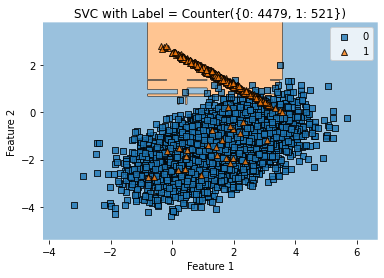

In [ ]:
bdtree_fit = bdtree.fit(features, label)
plot_decision_regions(features, label, bdtree_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

In [ ]:
cm_bdtree=confusion_matrix(label, bdtree.predict(features))
print(cm_bdtree)
accuracy_bdtree = accuracy_score(label, bdtree.predict(features))
print(f'Accuracy: {accuracy_bdtree}')

[[4460   19]
 [  43  478]]
Accuracy: 0.9876


In [ ]:
print(cm_tree_plain)
print(f'Accuracy: {accuracy_tree_plain}')

[[4442   37]
 [  47  474]]
Accuracy: 0.9832


In [ ]:
# In terms of accuracy AdaBoost is better than resampling